Sub-period portfolio performance analysis

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def downside_risk(returns, risk_free=0):
    adj_returns = returns - risk_free
    sqr_downside = np.square(np.clip(adj_returns, np.NINF, 0))
    return np.sqrt(np.nanmean(sqr_downside) * 252)

def MDD(data):
    data = (data+1).cumprod()
    roll_max = data.cummax()
    daily_drawdown = data/roll_max -1.0
    MDD = daily_drawdown.cummin()
    return (min(MDD.values)) 

In [3]:
SP500 = pd.read_csv('bechmark_sp500.csv',index_col='Date')
SP500.index = pd.to_datetime(SP500.index)
SP500

,Close
Date,
2001-01-02,100.000000
2001-01-03,105.009861
2001-01-04,103.901747
2001-01-05,101.175119
2001-01-08,100.981085
...,...
2021-08-25,350.369749
2021-08-26,348.328873
2021-08-27,351.396826


In [4]:
fund_price = SP500.copy()

fund_price_2007 = fund_price[(fund_price.index>='2001-01-01') & (fund_price.index<'2007-01-01')]
fund_price_2007 = fund_price_2007/fund_price_2007.iloc[0,:]

fund_price_2010 = fund_price[(fund_price.index>='2007-01-01') & (fund_price.index<'2010-01-01')]
fund_price_2010 = fund_price_2010/fund_price_2010.iloc[0,:]

fund_price_2020 = fund_price[(fund_price.index>='2010-01-01') & (fund_price.index<'2020-01-01')]
fund_price_2020 = fund_price_2020/fund_price_2020.iloc[0,:]

fund_price_2020_04 = fund_price[(fund_price.index>='2020-01-01') & (fund_price.index<'2020-05-01')]
fund_price_2020_04 = fund_price_2020_04/fund_price_2020_04.iloc[0,:]

fund_price_2021 = fund_price[(fund_price.index>='2020-05-01')]
fund_price_2021 = fund_price_2021/fund_price_2021.iloc[0,:]

# Ensure the directory exists
os.makedirs('S&P500/subperiod', exist_ok=True)

fund_price_2007.to_csv('S&P500/subperiod/' + 'S&P500_2007.csv')
fund_price_2010.to_csv('S&P500/subperiod/' + 'S&P500_2010.csv')
fund_price_2020.to_csv('S&P500/subperiod/' + 'S&P500_2020.csv')
fund_price_2020_04.to_csv('S&P500/subperiod/' + 'S&P500_2020_05.csv')
fund_price_2021.to_csv('S&P500/subperiod/' + 'S&P500_2021.csv')

In [5]:
path = 'full_correlation/price_with_transaction/'
file_list = os.listdir(path)
price_list = [file for file in file_list]
price_list.sort(key=lambda x: int(x.split('_')[-2]))
price_list

['GM_5_price.csv',
 'GM_10_price.csv',
 'GM_20_price.csv',
 'GM_30_price.csv',
 'GM_50_price.csv',
 'GM_100_price.csv',
 'GM_200_price.csv',
 'GM_300_price.csv',
 'GM_500_price.csv']

In [6]:
for file1 in price_list:
    fund_price = pd.read_csv(path+str(file1),index_col='Unnamed: 0')
    fund_price.index = pd.to_datetime(fund_price.index)
    fund_price_2007 = fund_price[(fund_price.index>='2001-01-01') & (fund_price.index<'2007-01-01')]
    fund_price_2007 = fund_price_2007/fund_price_2007.iloc[0,:]

    fund_price_2010 = fund_price[(fund_price.index>='2007-01-01') & (fund_price.index<'2010-01-01')]
    fund_price_2010 = fund_price_2010/fund_price_2010.iloc[0,:]

    fund_price_2020 = fund_price[(fund_price.index>='2010-01-01') & (fund_price.index<'2020-01-01')]
    fund_price_2020 = fund_price_2020/fund_price_2020.iloc[0,:]

    fund_price_2020_04 = fund_price[(fund_price.index>='2020-01-01') & (fund_price.index<'2020-05-01')]
    fund_price_2020_04 = fund_price_2020_04/fund_price_2020_04.iloc[0,:]

    fund_price_2021 = fund_price[(fund_price.index>='2020-05-01')]
    fund_price_2021 = fund_price_2021/fund_price_2021.iloc[0,:]

    # Ensure the directory exists
    os.makedirs('full_correlation/subperiod', exist_ok=True)

    fund_price_2007.to_csv('full_correlation/subperiod/' + file1.split('.')[0] + '_2007.csv')
    fund_price_2010.to_csv('full_correlation/subperiod/' + file1.split('.')[0] + '_2010.csv')
    fund_price_2020.to_csv('full_correlation/subperiod/' + file1.split('.')[0] + '_2020.csv')
    fund_price_2020_04.to_csv('full_correlation/subperiod/' + file1.split('.')[0] + '_2020_05.csv')
    fund_price_2021.to_csv('full_correlation/subperiod/' + file1.split('.')[0] + '_2021.csv')

In [7]:
path2 = 'subtraction/price_with_transaction/'
file_list = os.listdir(path2)
price_list2 = [file for file in file_list]
price_list2.sort(key=lambda x: int(x.split('_')[-2]))
price_list2

['GM_5_price.csv',
 'GM_10_price.csv',
 'GM_20_price.csv',
 'GM_30_price.csv',
 'GM_50_price.csv',
 'GM_100_price.csv',
 'GM_200_price.csv',
 'GM_300_price.csv',
 'GM_500_price.csv']

In [8]:
for file2 in price_list2:
    fund_price = pd.read_csv(path2+str(file2),index_col='Unnamed: 0')
    fund_price.index = pd.to_datetime(fund_price.index)
    fund_price_2007 = fund_price[(fund_price.index>='2001-01-01') & (fund_price.index<'2007-01-01')]
    fund_price_2007 = fund_price_2007/fund_price_2007.iloc[0,:]

    fund_price_2010 = fund_price[(fund_price.index>='2007-01-01') & (fund_price.index<'2010-01-01')]
    fund_price_2010 = fund_price_2010/fund_price_2010.iloc[0,:]

    fund_price_2020 = fund_price[(fund_price.index>='2010-01-01') & (fund_price.index<'2020-01-01')]
    fund_price_2020 = fund_price_2020/fund_price_2020.iloc[0,:]

    fund_price_2020_04 = fund_price[(fund_price.index>='2020-01-01') & (fund_price.index<'2020-05-01')]
    fund_price_2020_04 = fund_price_2020_04/fund_price_2020_04.iloc[0,:]

    fund_price_2021 = fund_price[(fund_price.index>='2020-05-01')]
    fund_price_2021 = fund_price_2021/fund_price_2021.iloc[0,:]

    # Ensure the directory exists
    os.makedirs('subtraction/subperiod', exist_ok=True)

    fund_price_2007.to_csv('subtraction/subperiod/' + file2.split('.')[0] + '_2007.csv')
    fund_price_2010.to_csv('subtraction/subperiod/' + file2.split('.')[0] + '_2010.csv')
    fund_price_2020.to_csv('subtraction/subperiod/' + file2.split('.')[0] + '_2020.csv')
    fund_price_2020_04.to_csv('subtraction/subperiod/' + file2.split('.')[0] + '_2020_05.csv')
    fund_price_2021.to_csv('subtraction/subperiod/' + file2.split('.')[0] + '_2021.csv')

Fig. 5. Cumulative log-returns of HRP models for the total backtesting period

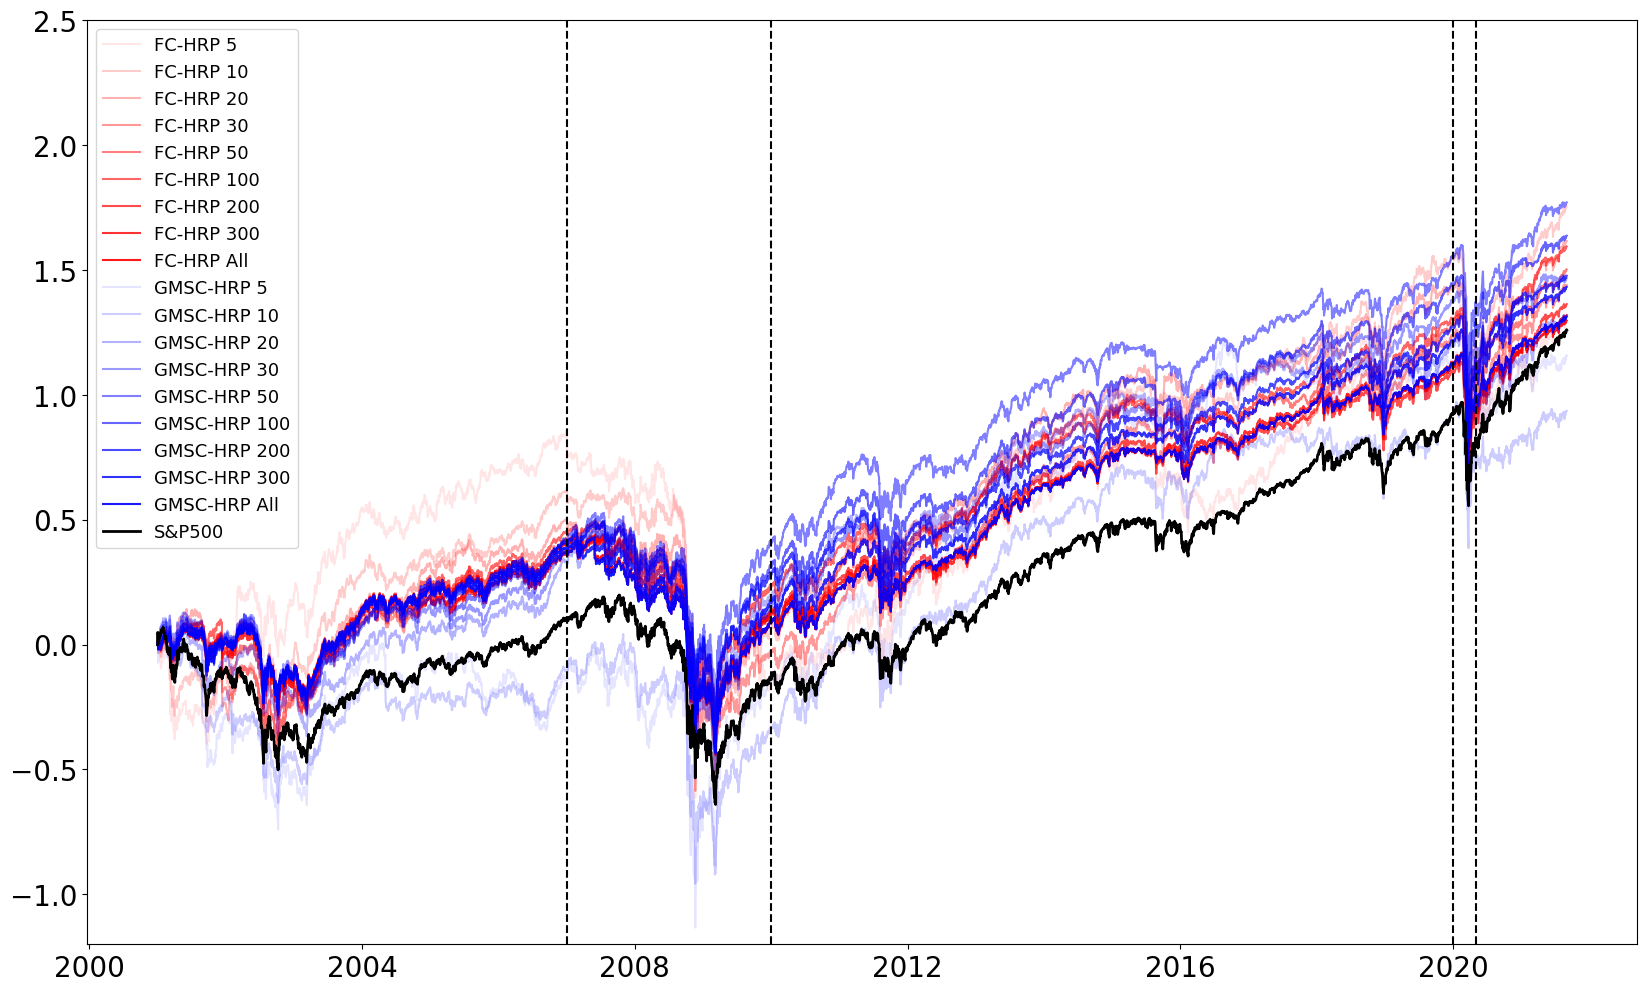

In [9]:
plt.figure(figsize=(20,12))
axes = plt.axes()
axes.set_ylim([-1.2,2.5])
ymin, ymax = axes.get_ylim()
counter1 = 0
counter2 = 0

color = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
name = ['FC-HRP 5','FC-HRP 10','FC-HRP 20','FC-HRP 30','FC-HRP 50','FC-HRP 100','FC-HRP 200','FC-HRP 300','FC-HRP All']
name2 = ['GMSC-HRP 5','GMSC-HRP 10','GMSC-HRP 20','GMSC-HRP 30','GMSC-HRP 50','GMSC-HRP 100','GMSC-HRP 200','GMSC-HRP 300','GMSC-HRP All']

for file1 in price_list:
    
    fund_price = pd.read_csv(path+str(file1),index_col='Unnamed: 0')
    fund_price.index = pd.to_datetime(fund_price.index)
    log_price = np.log(fund_price/fund_price.shift(1)).fillna(0)
    plt.plot(log_price['Price'].cumsum(),label=name[counter1],linestyle='-',linewidth=1.5, color="red", alpha= color[counter1])
    counter1+=1

for file2 in price_list2:    
    fund_price = pd.read_csv(path2+str(file2),index_col='Unnamed: 0')
    fund_price.index = pd.to_datetime(fund_price.index)
    log_price = np.log(fund_price/fund_price.shift(1)).fillna(0)
    plt.plot(log_price['Price'].cumsum(),label=name2[counter2],linestyle='-',linewidth=1.5, color="blue", alpha= color[counter2])
    counter2+=1
    
log_sp500 = np.log(SP500/SP500.shift(1)).fillna(0)
plt.plot(log_sp500.cumsum(),label='S&P500',linestyle='-',linewidth=2, color='black')
plt.vlines(x=[datetime(2007, 1, 1)], ymin=ymin ,ymax=ymax, color='black',ls='--')
plt.vlines(x=[datetime(2010, 1, 1)], ymin=ymin ,ymax=ymax, color='black',ls='--')
plt.vlines(x=[datetime(2020, 1, 1)], ymin=ymin ,ymax=ymax, color='black',ls='--')
plt.vlines(x=[datetime(2020, 5, 1)], ymin=ymin ,ymax=ymax, color='black',ls='--')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=13)

In [10]:
path = 'full_correlation/subperiod/'
file_list = os.listdir(path)
price_list = [file for file in file_list]
price_list.sort(key=lambda x: ( int(x.split('_')[-1].replace('.csv','')), int(x.split('_')[1])))
price_list

['GM_5_price_2020_05.csv',
 'GM_10_price_2020_05.csv',
 'GM_20_price_2020_05.csv',
 'GM_30_price_2020_05.csv',
 'GM_50_price_2020_05.csv',
 'GM_100_price_2020_05.csv',
 'GM_200_price_2020_05.csv',
 'GM_300_price_2020_05.csv',
 'GM_500_price_2020_05.csv',
 'GM_5_price_2007.csv',
 'GM_10_price_2007.csv',
 'GM_20_price_2007.csv',
 'GM_30_price_2007.csv',
 'GM_50_price_2007.csv',
 'GM_100_price_2007.csv',
 'GM_200_price_2007.csv',
 'GM_300_price_2007.csv',
 'GM_500_price_2007.csv',
 'GM_5_price_2010.csv',
 'GM_10_price_2010.csv',
 'GM_20_price_2010.csv',
 'GM_30_price_2010.csv',
 'GM_50_price_2010.csv',
 'GM_100_price_2010.csv',
 'GM_200_price_2010.csv',
 'GM_300_price_2010.csv',
 'GM_500_price_2010.csv',
 'GM_5_price_2020.csv',
 'GM_10_price_2020.csv',
 'GM_20_price_2020.csv',
 'GM_30_price_2020.csv',
 'GM_50_price_2020.csv',
 'GM_100_price_2020.csv',
 'GM_200_price_2020.csv',
 'GM_300_price_2020.csv',
 'GM_500_price_2020.csv',
 'GM_5_price_2021.csv',
 'GM_10_price_2021.csv',
 'GM_20_pric

In [11]:
summary = pd.DataFrame(columns = price_list, index = ['Annualized compound return','Annualized Standard Deviation',\
                                                    'Maximum Drawdown','Sharpe Ratio','Calmar Ratio'])
for fund_price in price_list:
    data = pd.read_csv(path+fund_price,index_col='Unnamed: 0')
    log_ret = np.log(data/data.shift(periods=1))
    log_ret = log_ret.dropna()
    log_ret.index = data.index[1:]

    #Annualized coupound return
    cumsum = (data.values[-1] /data.values[0] -1)
    acr = cumsum/(len(log_ret.values) / 252)
    summary[fund_price][0] = round(acr[0], 4)

    #Annualized Standard Deviation
    stdev = np.std(log_ret.values)*np.sqrt(252)
    summary[fund_price][1] = round(stdev, 4)


    #MDD
    mdd = MDD(log_ret)
    summary[fund_price][2] = round(mdd[0], 4)

    #Sharpe
    sharpe = acr/stdev
    # sharpe = acr/stdev
    summary[fund_price][3] = round(sharpe[0], 4)
    
    #Calmar Ratio
    calmar = acr/abs(mdd)
    summary[fund_price][4] = round(calmar[0], 4)
    
summary.to_csv("subperiod_full_correlation.csv")
summary

,GM_5_price_2020_05.csv,GM_10_price_2020_05.csv,GM_20_price_2020_05.csv,GM_30_price_2020_05.csv,GM_50_price_2020_05.csv,GM_100_price_2020_05.csv,GM_200_price_2020_05.csv,GM_300_price_2020_05.csv,GM_500_price_2020_05.csv,GM_5_price_2007.csv,...,GM_500_price_2020.csv,GM_5_price_2021.csv,GM_10_price_2021.csv,GM_20_price_2021.csv,GM_30_price_2021.csv,GM_50_price_2021.csv,GM_100_price_2021.csv,GM_200_price_2021.csv,GM_300_price_2021.csv,GM_500_price_2021.csv
Annualized compound return,-0.8415,-0.8528,-0.7915,-0.6895,-0.6395,-0.5317,-0.4609,-0.4609,-0.4169,0.2272,...,0.1788,0.3915,0.6137,0.5231,0.4802,0.4746,0.4961,0.4421,0.3486,0.3196
Annualized Standard Deviation,0.792,0.752,0.7232,0.6656,0.6584,0.6248,0.5914,0.5789,0.5424,0.232,...,0.1259,0.2765,0.2442,0.1932,0.188,0.183,0.1677,0.1643,0.1548,0.146
Maximum Drawdown,-0.5675,-0.5432,-0.5109,-0.4842,-0.4754,-0.4514,-0.4197,-0.415,-0.3927,-0.3627,...,-0.1849,-0.1472,-0.1244,-0.0963,-0.0902,-0.0902,-0.0928,-0.1013,-0.1002,-0.0965
Sharpe Ratio,-1.0624,-1.134,-1.0943,-1.0358,-0.9714,-0.8509,-0.7793,-0.7962,-0.7686,0.9794,...,1.4208,1.4156,2.513,2.708,2.5548,2.5938,2.9574,2.6901,2.2519,2.1895
Calmar Ratio,-1.4828,-1.5698,-1.5493,-1.4239,-1.3452,-1.1778,-1.0981,-1.1107,-1.0616,0.6263,...,0.967,2.6598,4.9332,5.4315,5.3226,5.261,5.3459,4.3624,3.4796,3.311


In [12]:
path = 'subtraction/subperiod/'
file_list = os.listdir(path)
price_list = [file for file in file_list]
price_list.sort(key=lambda x: ( int(x.split('_')[-1].replace('.csv','')), int(x.split('_')[1])))
price_list

['GM_5_price_2020_05.csv',
 'GM_10_price_2020_05.csv',
 'GM_20_price_2020_05.csv',
 'GM_30_price_2020_05.csv',
 'GM_50_price_2020_05.csv',
 'GM_100_price_2020_05.csv',
 'GM_200_price_2020_05.csv',
 'GM_300_price_2020_05.csv',
 'GM_500_price_2020_05.csv',
 'GM_5_price_2007.csv',
 'GM_10_price_2007.csv',
 'GM_20_price_2007.csv',
 'GM_30_price_2007.csv',
 'GM_50_price_2007.csv',
 'GM_100_price_2007.csv',
 'GM_200_price_2007.csv',
 'GM_300_price_2007.csv',
 'GM_500_price_2007.csv',
 'GM_5_price_2010.csv',
 'GM_10_price_2010.csv',
 'GM_20_price_2010.csv',
 'GM_30_price_2010.csv',
 'GM_50_price_2010.csv',
 'GM_100_price_2010.csv',
 'GM_200_price_2010.csv',
 'GM_300_price_2010.csv',
 'GM_500_price_2010.csv',
 'GM_5_price_2020.csv',
 'GM_10_price_2020.csv',
 'GM_20_price_2020.csv',
 'GM_30_price_2020.csv',
 'GM_50_price_2020.csv',
 'GM_100_price_2020.csv',
 'GM_200_price_2020.csv',
 'GM_300_price_2020.csv',
 'GM_500_price_2020.csv',
 'GM_5_price_2021.csv',
 'GM_10_price_2021.csv',
 'GM_20_pric

In [13]:
summary = pd.DataFrame(columns = price_list, index = ['Annualized compound return','Annualized Standard Deviation',\
                                                    'Maximum Drawdown','Sharpe Ratio','Calmar Ratio'])
for fund_price in price_list:
    data = pd.read_csv(path+fund_price,index_col='Unnamed: 0')
    log_ret = np.log(data/data.shift(periods=1))
    log_ret = log_ret.dropna()
    log_ret.index = data.index[1:]

    #Annualized coupound return
    cumsum = (data.values[-1] /data.values[0] -1)
    acr = cumsum/(len(log_ret.values) / 252)
    summary[fund_price][0] = round(acr[0], 4)

    #Annualized Standard Deviation
    stdev = np.std(log_ret.values)*np.sqrt(252)
    summary[fund_price][1] = round(stdev, 4)


    #MDD
    mdd = MDD(log_ret)
    summary[fund_price][2] = round(mdd[0], 4)

    #Sharpe
    sharpe = acr/stdev
    # sharpe = acr/stdev
    summary[fund_price][3] = round(sharpe[0], 4)
    
    #Calmar Ratio
    calmar = acr/abs(mdd)
    summary[fund_price][4] = round(calmar[0], 4)
    
summary.to_csv("subperiod_subtraction.csv")
summary

,GM_5_price_2020_05.csv,GM_10_price_2020_05.csv,GM_20_price_2020_05.csv,GM_30_price_2020_05.csv,GM_50_price_2020_05.csv,GM_100_price_2020_05.csv,GM_200_price_2020_05.csv,GM_300_price_2020_05.csv,GM_500_price_2020_05.csv,GM_5_price_2007.csv,...,GM_500_price_2020.csv,GM_5_price_2021.csv,GM_10_price_2021.csv,GM_20_price_2021.csv,GM_30_price_2021.csv,GM_50_price_2021.csv,GM_100_price_2021.csv,GM_200_price_2021.csv,GM_300_price_2021.csv,GM_500_price_2021.csv
Annualized compound return,-0.5311,-0.5091,-0.5989,-0.5379,-0.586,-0.4944,-0.4126,-0.3715,-0.3795,-0.0222,...,0.1814,0.1893,0.1702,0.3203,0.2685,0.4307,0.366,0.3433,0.3377,0.3095
Annualized Standard Deviation,0.7295,0.6822,0.6831,0.6482,0.6546,0.6217,0.6021,0.5699,0.531,0.2307,...,0.1257,0.2043,0.1893,0.1859,0.1753,0.1766,0.1667,0.164,0.1616,0.1456
Maximum Drawdown,-0.4759,-0.4716,-0.4782,-0.4595,-0.4771,-0.4382,-0.4161,-0.3963,-0.3801,-0.5785,...,-0.1831,-0.1244,-0.1333,-0.1339,-0.122,-0.1269,-0.1168,-0.1159,-0.1121,-0.0967
Sharpe Ratio,-0.728,-0.7462,-0.8766,-0.8299,-0.8952,-0.7952,-0.6852,-0.6518,-0.7147,-0.0961,...,1.4431,0.9269,0.8995,1.723,1.5316,2.4386,2.1962,2.0924,2.09,2.1266
Calmar Ratio,-1.116,-1.0795,-1.2522,-1.1708,-1.2283,-1.1283,-0.9914,-0.9372,-0.9983,-0.0383,...,0.9907,1.5216,1.2767,2.3927,2.2002,3.3935,3.133,2.9616,3.0137,3.2012


In [14]:
path = 'S&P500/subperiod/'
file_list = os.listdir(path)
price_list = [file for file in file_list]
price_list.sort(key=lambda x: int(x.split('_')[1].replace('.csv','')))
price_list

['S&P500_2007.csv',
 'S&P500_2010.csv',
 'S&P500_2020_05.csv',
 'S&P500_2020.csv',
 'S&P500_2021.csv']

In [15]:
summary = pd.DataFrame(columns = price_list, index = ['Annualized compound return','Annualized Standard Deviation',\
                                                    'Maximum Drawdown','Sharpe Ratio','Calmar Ratio'])
for fund_price in price_list:
    data = pd.read_csv(path+fund_price,index_col='Date')
    log_ret = np.log(data/data.shift(periods=1))
    log_ret = log_ret.dropna()
    log_ret.index = data.index[1:]

    #Annualized coupound return
    cumsum = (data.values[-1] /data.values[0] -1)
    acr = cumsum/(len(log_ret.values) / 252)
    summary[fund_price][0] = round(acr[0], 4)

    #Annualized Standard Deviation
    stdev = np.std(log_ret.values)*np.sqrt(252)
    summary[fund_price][1] = round(stdev, 4)


    #MDD
    mdd = MDD(log_ret)
    summary[fund_price][2] = round(mdd[0], 4)

    #Sharpe
    sharpe = acr/stdev
    # sharpe = acr/stdev
    summary[fund_price][3] = round(sharpe[0], 4)
    
    #Calmar Ratio
    calmar = acr/abs(mdd)
    summary[fund_price][4] = round(calmar[0], 4)
    
summary.to_csv("subperiod_S&P500.csv")
summary

,S&P500_2007.csv,S&P500_2010.csv,S&P500_2020_05.csv,S&P500_2020.csv,S&P500_2021.csv
Annualized compound return,0.0176,-0.071,-0.3258,0.1855,0.4483
Annualized Standard Deviation,0.1707,0.2995,0.5391,0.1479,0.1623
Maximum Drawdown,-0.4605,-0.6103,-0.361,-0.207,-0.0979
Sharpe Ratio,0.1031,-0.2372,-0.6044,1.2546,2.7626
Calmar Ratio,0.0382,-0.1164,-0.9025,0.8962,4.5785
